<a href="https://colab.research.google.com/github/tanderson11/covid_households/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive + Github Configuration

If running for the first time, uncomment the necessary line to clone the repository

You'll have to authenticate on google drive if the runtime times out.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%mkdir /content/gdrive/My\ Drive/github
%cd /content/gdrive/My\ Drive/github

mkdir: cannot create directory ‘/content/gdrive/My Drive/github’: File exists
/content/gdrive/My Drive/github


In [3]:
username="tanderson11"
repository="covid_households"

In [4]:
### UNCOMMENT THIS LINE TO CLONE FOR THE FIRST TIME
#!git clone https://github.com/tanderson11/covid_households.git

### UNCOMMENT THIS LINE TO PULL CHANGES
#!git pull

In [5]:
%cd covid_households/
!ls -al

# if using token interface
#!echo git_token=\"your_token_here\" > git_token.py
#from git_token import git_token
#!git clone https://{git_token}@github.com/{username}/{repository}


/content/gdrive/My Drive/github/covid_households
total 585
-rw------- 1 root root   1335 Apr 20 16:17 constants.py
-rw------- 1 root root  29003 Apr 20 16:17 Example.ipynb
-rw------- 1 root root   4144 Apr 20 16:17 forward_simulation.py
drwx------ 2 root root   4096 Apr 20 16:16 .git
-rw------- 1 root root   1385 Apr 20 20:02 .gitignore
-rw------- 1 root root     53 Apr 20 20:04 git_token.py
-rw------- 1 root root  11325 Apr 21 00:26 InfectionModel.py
drwx------ 2 root root   4096 Apr 20 16:42 .ipynb_checkpoints
-rw------- 1 root root    675 Apr 20 16:17 Likelihood.py
drwx------ 2 root root   4096 Apr 20 16:18 __pycache__
-rw------- 1 root root     18 Apr 20 16:17 README.md
-rw------- 1 root root    123 Apr 20 16:28 settings.py
-rw------- 1 root root   8220 Apr 20 16:37 torch_forward_simulation.py
-rw------- 1 root root   1372 Apr 20 16:17 utilities.py
-rw------- 1 root root 511698 Apr 20 16:17 Vaccine.ipynb
-rw------- 1 root root  13138 Apr 21 00:34 Vaccine.py


# Initialization

In [6]:
# Initialization
import pandas as pd
import numpy as np
from Vaccine import VaccineStudy
import utilities

# Experiments

In [7]:
# Shows the parameters we need to create a VaccineStudy
print(VaccineStudy.__init__.__doc__)


        Creates a VaccineStudy, which represents a two-armed study with a group of households receiving the vaccine and a group receiving the placebo.

        Parameters
        ----------
        name : str
            a name for the study
        n_per_arm : int
            the total number of households per arm of the study
        sizes : list of ints
            the household sizes among which to divide evenly the total number of households in the study
        hsar : float
            the desired average (over the household sizes specified) household secondary attack rate
        es : float
            the true parameter reduction in a vaccinated individual's susceptibility
        (et_method, et) : (string, float)
            either a tuple of the form ('hsarv', float) to express the hsar calculated relative to vaccinated individuals
            or of the form ('et', float) to express the relative infectivity reduction among vaccinated individuals
        duration : int
      

In [8]:
# --- Setting parameters for a VaccineStudy ---

n_per_arm = 50 # the number of households in each arm of the study (arms are 'vaccinated' and 'placebo')
sizes = [8] # the number of households per arm are divided evenly among the sizes, if there are multiple 
#sizes = [4,5,6,7,8] 


hsar = 0.2 # the desired household sar
hsarv = 0.1 # the hsar calculated in reference to vaccinated individuals (therefore encoding vaccine effect on infectivity)

es = 0.7 # = 1 - the relative chance per contact of an infection passing to a vaccinated individual

# Duration of the study and importation rate
duration = 90 # days
importation_probability_over_study = 0.1 # probability an unvaccinateed individual becomes infected over the whole course of the study
importation_rate = 1-(1-importation_probability_over_study)**(1/duration) # converting risk over study period to daily risk

# Specifying the vaccination protocol. Common methods such as vaccinating one individual, a fraction of individuals, or a fixed number of individuals are made available
from Vaccine import vaccinate_one, vaccinate_number, vaccinate_fraction # vaccinates one individual in each household
vaccination_method = vaccinate_one
#vaccination_method = functools.partial(vaccinate_fraction,fraction_vaccinated=0.5)

In [9]:
# --- Create a study object, which provides methods for easy simulation and calculation of statistics ---
one_vax_study = VaccineStudy("one vaccinated", n_per_arm, sizes, hsar, es, (hsarv, 'hsarv'), duration, importation_rate, vaccination_method)

Running study ...
 Vaccine study named one vaccinated with:
	n_per_arm        = 50
	household sizes  = {8: 50}
	es, hsarv        = 0.700, 0.100
	vax_sus, vax_inf   = 0.300, 0.463
	duration         = 90
	importation rate = 0.001
	household beta   = 0.033
	min r0, max r0   = 1.620, 1.620


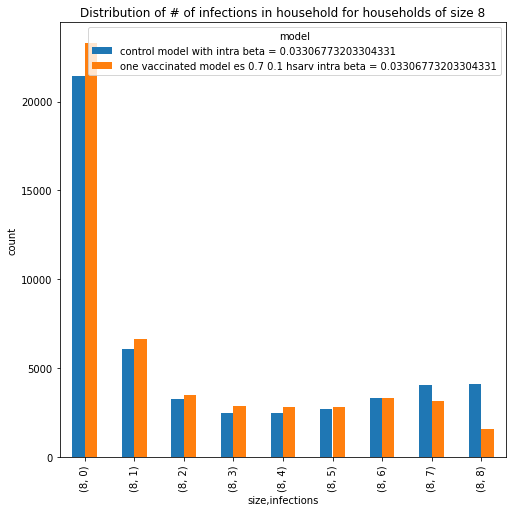

In [10]:
# --- Run the study some number of times ---
trials = 1000
vax_df, control_df = one_vax_study.run_trials(trials, arms="both") # we collect the results of our study in two Pandas DataFrames. For more information see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
utilities.make_bar_chart(pd.concat([vax_df, control_df])) # look at histograms of infections to check for coherence or interesting results

In [11]:
# --- Analyze the results ---

vax_df

,size,model,infections,num vaccinated,vaccinated infected,unvaccinated infected,num unvaccinated,trialnum
0,8,one vaccinated model es 0.7 0.1 hsarv intra be...,0,1.0,0,0,7.0,0
1,8,one vaccinated model es 0.7 0.1 hsarv intra be...,4,1.0,1,3,7.0,0
2,8,one vaccinated model es 0.7 0.1 hsarv intra be...,7,1.0,0,7,7.0,0
3,8,one vaccinated model es 0.7 0.1 hsarv intra be...,1,1.0,1,0,7.0,0
4,8,one vaccinated model es 0.7 0.1 hsarv intra be...,0,1.0,0,0,7.0,0
...,...,...,...,...,...,...,...,...
49995,8,one vaccinated model es 0.7 0.1 hsarv intra be...,0,1.0,0,0,7.0,999
49996,8,one vaccinated model es 0.7 0.1 hsarv intra be...,0,1.0,0,0,7.0,999
49997,8,one vaccinated model es 0.7 0.1 hsarv intra be...,0,1.0,0,0,7.0,999
49998,8,one vaccinated model es 0.7 0.1 hsarv intra be...,2,1.0,0,2,7.0,999


# Making a git commit from all changes

Manually save notebook first! (And configure your name before running the first time)

In [12]:
!git add -A
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   InfectionModel.py
	modified:   Vaccine.py



In [15]:
!git config --global user.email ""
!git config --global user.email "Thayer"

In [16]:
message = input("Commit message? ")

!git commit -m "{message}"

Commit message? Tweaking documentation and adding basic r0 calculator
[main a6ddd69] Tweaking documentation and adding basic r0 calculator
 2 files changed, 23 insertions(+), 15 deletions(-)


# Pushing upstream

In [18]:
from git_token import git_token

!git remote set-url origin https://{git_token}@github.com/{username}/{repository}
!git push

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 1.14 KiB | 1.14 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/tanderson11/covid_households
   f979b48..a6ddd69  main -> main
